In [6]:
import yfinance as yf
import numpy as np
import pandas as pd

In [7]:
start = '2015-01-01'

In [8]:
overall = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [9]:
overall

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [10]:
stocks = overall.Symbol

In [11]:
stocks.head(5)

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object

In [12]:
stocks = stocks.to_list()

In [13]:
overall = overall[overall['Date added'] >= 'start']
#only those are relevant after the starting date of the analysis

In [14]:
removed = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1][['Date','Removed']]

In [15]:
removed

Date Removed                           
                  Date  Ticker                   Security
0        June 24, 2024     RHI                Robert Half
1        June 24, 2024     CMA                   Comerica
2        June 24, 2024    ILMN             Illumina, Inc.
3          May 8, 2024     PXD  Pioneer Natural Resources
4        April 3, 2024    XRAY            Dentsply Sirona
..                 ...     ...                        ...
343       June 9, 1999     HPH   Harnischfeger Industries
344  December 11, 1998     LDW                      Amoco
345  December 11, 1998     GRN                 General Re
346  December 11, 1998     SUN                 SunAmerica
347      June 17, 1997     USL                     USLife

[348 rows x 3 columns]

In [16]:
removed = removed.set_index(removed.Date.Date)

In [17]:
removed.index = pd.to_datetime(removed.index)

In [18]:
removed = removed[removed.index >= start]

In [19]:
removed = removed.Removed.dropna()

In [20]:
removed

,Ticker,Security
Date,,
2024-06-24,RHI,Robert Half
2024-06-24,CMA,Comerica
2024-06-24,ILMN,"Illumina, Inc."
2024-05-08,PXD,Pioneer Natural Resources
2024-04-03,XRAY,Dentsply Sirona
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [21]:
stocks.extend(removed.Ticker.to_list())
# include already removed symbols in our analysis

In [22]:
df = yf.download(stocks,start=start)['Close']

[                       1%%                      ]  10 of 700 completed

$SPLS: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$LLTC: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$SIAL: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**                     5%%                      ]  36 of 700 completed

$MJN: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$RAI: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[******                13%%                      ]  88 of 700 completed

$DPS: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[*******               14%%                      ]  101 of 700 completed

$CMCSK: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[********              16%%                      ]  111 of 700 completed

$CPGX: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$BXLT: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[************          25%%                      ]  173 of 700 completed

$SNDK: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[*************         28%%                      ]  197 of 700 completed

$BRCM: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$STJ: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$TWC: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[****************      33%%                      ]  228 of 700 completed

$WFM: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[*****************     36%%                      ]  251 of 700 completed

$BCR: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[******************    38%%                      ]  266 of 700 completed

$GMCR: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************49%%                      ]  340 of 700 completed

$WYN: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************52%%                      ]  366 of 700 completed

$GGP: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************54%%                      ]  378 of 700 completed

$ARG: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************62%%****                  ]  433 of 700 completed

$TYC: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$CVC: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************64%%*****                 ]  448 of 700 completed

$SWY: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************65%%*****                 ]  458 of 700 completed

$HCBK: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$FDO: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************75%%**********            ]  525 of 700 completed

$JOY: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************76%%**********            ]  534 of 700 completed

$LO: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************80%%************          ]  562 of 700 completed

$BF.B: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$CAM: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************83%%**************        ]  581 of 700 completed

$TE: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************86%%***************       ]  603 of 700 completed

$HSP: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)
$CFN: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************89%%*****************     ]  621 of 700 completed

$KRFT: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[**********************97%%********************* ]  677 of 700 completed

$LVLT: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)


[*********************100%%**********************]  700 of 700 completed

86 Failed downloads:
['SPLS', 'LLTC', 'SIAL', 'MJN', 'RAI', 'DPS', 'CMCSK', 'CPGX', 'BXLT', 'SNDK', 'BRCM', 'STJ', 'TWC', 'WFM', 'BCR', 'GMCR', 'WYN', 'GGP', 'ARG', 'TYC', 'CVC', 'SWY', 'HCBK', 'FDO', 'JOY', 'LO', 'BF.B', 'CAM', 'TE', 'HSP', 'CFN', 'KRFT', 'LVLT']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2015-01-01 -> 2024-08-16)')
['CXO', 'BRK.B', 'CELG', 'LLL', 'XLNX', 'XL', 'DRE', 'FTR', 'NLSN', 'AVP', 'WCG', 'CERN', 'KSU', 'BBBY', 'DWDP', 'MON', 'RTN', 'TWTR', 'DISH', 'YHOO', 'QEP', 'WIN', 'TSS', 'LM', 'HFC', 'ADS', 'TIF', 'APC', 'FLIR', 'ABMD', 'DNR', 'CTXS', 'NBL', 'VIAB', 'ESV', 'FRC', 'PXD', 'XEC', 'ATVI', 'DTV', 'AGN', 'ARNC', 'PBCT', 'VAR', 'MXIM', 'ETFC', 'RHT', 'MNK', 'FBHS', 'INFO', 'ALXN']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
['ENDP', 'SIVB']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [23]:
df.index = pd.to_datetime(df.index)

In [24]:
removed[removed.Ticker == 'SBNY'].index[0]

Timestamp('2023-03-15 00:00:00')

In [25]:
df['SBNY'] #currently we still have prices until the last day

Date
2015-01-02     NaN
2015-01-05     NaN
2015-01-06     NaN
2015-01-07     NaN
2015-01-08     NaN
              ... 
2024-08-09     NaN
2024-08-12     NaN
2024-08-13     NaN
2024-08-14     NaN
2024-08-15    2.15
Name: SBNY, Length: 2421, dtype: float64

In [26]:
df['SBNY'].index <= removed[removed.Ticker == 'SBNY'].index[0]
#filter for dates before the removal date

array([ True,  True,  True, ..., False, False, False])

In [27]:
df['SBNY'] = df['SBNY'][df['SBNY'].index <= removed[removed.Ticker == 'SBNY'].index[0]]

In [28]:
df['SBNY'] # now no prices after that date

Date
2015-01-02   NaN
2015-01-05   NaN
2015-01-06   NaN
2015-01-07   NaN
2015-01-08   NaN
              ..
2024-08-09   NaN
2024-08-12   NaN
2024-08-13   NaN
2024-08-14   NaN
2024-08-15   NaN
Name: SBNY, Length: 2421, dtype: float64

In [29]:
def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed.Ticker == ticker].index[0]]

In [30]:
def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= 
                            overall[overall.Symbol == ticker]['Date added'].values[0]]

In [31]:
for ticker_rem in removed.Ticker:
    pricefilter_rem(ticker_rem)
for ticker_add in overall.Symbol:
    pricefilter_add(ticker_add)

In [32]:
# until here we went last time
# we filtered our price dataframe (df) for removed and added stocks

In [33]:
ret_df = df.pct_change()

/var/folders/0p/flqf36bd13l_7qbnftvl4gxw0000gn/T/ipykernel_22046/902390033.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret_df = df.pct_change()


In [34]:
ret_df

Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018738,-0.057935,-0.000556,-0.013181,-0.028172,-0.018819,NaN,NaN,0.000223,NaN,...,-0.027362,-0.006932,-0.021818,-0.062237,NaN,-0.020318,0.037304,-0.014077,-0.037469,-0.006003
2015-01-06,-0.015578,0.007353,-0.015590,-0.000703,0.000094,-0.004950,NaN,NaN,-0.011356,NaN,...,-0.005316,-0.012410,-0.013383,-0.005881,NaN,-0.012274,-0.008477,-0.007205,-0.038193,-0.009756
2015-01-07,0.013272,0.025879,-0.000566,0.021489,0.014022,0.040417,NaN,NaN,0.008108,NaN,...,0.010133,0.025918,0.012811,0.007887,NaN,0.033138,0.024870,0.025465,0.009546,0.020643
2015-01-08,0.029975,0.028461,0.012262,0.008765,0.038422,0.010459,NaN,NaN,0.020554,NaN,...,0.016645,0.024689,0.027530,0.007546,NaN,0.017420,0.010617,0.021359,0.013994,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,0.001024,0.000000,-0.003033,0.000000,0.013736,-0.002468,NaN,0.003838,-0.009566,NaN,...,0.008143,0.000000,0.000000,0.002026,NaN,-0.002261,-0.005704,-0.005471,0.000000,-0.016198
2024-08-12,-0.009496,0.000000,-0.025355,0.000000,0.005966,0.001316,NaN,-0.012687,-0.008371,NaN,...,0.001262,0.000000,0.000000,-0.008477,NaN,-0.008480,-0.009993,0.001219,0.000000,-0.007773
2024-08-13,0.013422,0.000000,0.020812,0.000000,0.017193,0.005521,NaN,0.028868,0.004082,NaN,...,-0.009580,0.000000,0.000000,0.033020,NaN,0.014451,0.021589,0.036773,0.000000,0.024863


In [35]:
mtl_ret = (ret_df + 1).resample('ME').prod()

In [36]:
mtl_ret

Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,0.931213,0.985516,0.910406,1.002775,1.071618,0.915920,1.0,1.000000,0.996882,1.0,...,0.941721,0.963412,0.957818,0.895483,1.0,0.999032,0.995648,1.077877,0.846942,0.986608
2015-02-28,1.117554,0.945048,0.975958,0.974402,1.096449,1.002486,1.0,1.000000,1.058311,1.0,...,1.012812,1.059564,1.036447,1.046921,1.0,1.122164,1.073952,1.090942,1.116027,1.078633
2015-03-31,0.984364,0.873563,1.101879,0.966178,0.968628,0.967603,1.0,1.000000,0.978045,1.0,...,0.960018,0.960008,0.941392,0.980952,1.0,0.970534,0.976161,0.996376,1.009723,1.004339
2015-04-30,0.995668,1.038700,0.914930,0.955308,1.005786,1.104544,1.0,1.000000,1.001943,1.0,...,1.027882,1.002162,0.894942,1.057110,1.0,1.091972,0.934649,1.014991,1.049630,0.959602
2015-05-31,0.995649,0.931446,0.877407,1.071469,1.040991,1.029848,1.0,1.000000,1.046963,1.0,...,0.975163,1.020392,0.993044,0.987844,1.0,1.048278,1.038693,1.190704,1.019054,1.120441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,0.941791,1.000000,0.880130,1.000000,0.993294,0.893136,1.0,0.961263,0.932342,1.0,...,1.017464,0.959626,1.000000,1.011297,1.0,1.018752,0.911350,1.043524,1.000000,0.941079
2024-05-31,0.951620,1.000000,0.851221,1.000000,1.128691,0.991392,1.0,0.913981,0.964330,1.0,...,0.991460,1.000000,1.000000,1.078960,1.0,0.972956,0.957350,0.992943,1.000000,1.064808
2024-06-30,0.994019,1.000000,0.985217,1.000000,1.095553,1.063756,1.0,1.046229,1.016831,1.0,...,0.981750,1.000000,1.000000,0.961778,1.0,0.963836,0.942510,0.989082,1.000000,1.022411


In [37]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()

In [38]:
mtl_12

Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,1.030819,0.621536,0.785569,0.949231,0.962773,0.899074,1.0,1.000000,1.000223,1.0,...,0.839707,1.171770,0.773091,0.958508,1.0,1.009675,0.911182,0.899522,0.965005,1.106442
2016-01-31,0.996823,0.465815,0.794417,0.956289,0.830830,0.909694,1.0,1.000000,0.845621,1.0,...,0.890528,1.177094,0.740319,1.054252,1.0,1.001245,0.885459,0.723700,0.946578,1.007489
2016-02-29,0.884861,0.603786,0.855950,0.958110,0.752686,0.902645,1.0,1.000000,0.817817,1.0,...,0.905241,1.149972,0.704029,1.047899,1.0,0.893478,0.804137,0.678528,0.797307,0.890866
2016-03-31,0.959085,0.741486,0.776999,1.071147,0.875914,0.975743,1.0,1.000000,0.902871,1.0,...,0.983412,1.211043,0.868482,1.167904,1.0,1.039761,0.907335,0.760582,0.896667,0.957658
2016-04-30,0.989123,0.832340,0.718368,1.091608,0.749021,0.943396,1.0,1.000000,0.838001,1.0,...,1.011789,1.168627,0.834783,1.128579,1.0,0.925547,1.053988,0.679409,0.971066,1.058757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,1.011888,1.000000,0.990469,0.510476,1.003831,1.076231,1.0,1.325061,0.959265,1.0,...,0.999408,0.759599,1.000000,1.258667,1.0,1.004766,0.868824,1.092108,1.426059,0.905905
2024-05-31,1.127432,1.000000,0.778078,0.879133,1.084626,1.168745,1.0,1.320306,1.001863,1.0,...,1.147583,0.881783,1.000000,1.407385,1.0,1.067915,0.904272,1.189549,1.455845,1.040182
2024-06-30,1.078004,1.000000,0.631550,0.911522,1.085838,1.273065,1.0,1.183130,0.953128,1.0,...,1.073380,0.795852,1.000000,1.204315,1.0,0.956045,0.745398,1.044282,1.479151,1.006678


In [39]:
top_ = mtl_12.loc['2015-12-31'].nlargest(5)

In [40]:
top_

Ticker
CZR     2.722772
NFLX    2.294549
AMZN    2.190749
EPAM    1.691844
AYI     1.671433
Name: 2015-12-31 00:00:00, dtype: float64

In [41]:
top_.name

Timestamp('2015-12-31 00:00:00')

In [37]:
mtl_ret[top_.name:][1:2]

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.900502,0.738602,0.920661,1.010232,0.924758,0.926739,0.863562,0.945171,0.842797,1.0,...,0.998717,0.96779,0.917215,0.984932,1.0,0.990691,0.967541,1.0,0.830769,0.898372


In [38]:
relevant_ret = mtl_ret[top_.name:][1:2][top_.index]

In [39]:
relevant_ret

,ABMD,NFLX,AMZN,AYI,NVDA
Date,,,,,
2016-01-31,0.945171,0.802938,0.868485,0.865825,0.888653


In [40]:
relevant_ret.mean(axis=1)

Date
2016-01-31    0.874214
Freq: M, dtype: float64

In [63]:
def top_performers(date):
    all_ = mtl_12.loc[date]
    top = all_.nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return (relevant_ret).mean(axis=1).values[0]

In [64]:
top_performers('2015-12-31')

0.892359377588893

In [65]:
returns = []
for date in mtl_12.index[:-1]:
    returns.append(top_performers(date))

In [66]:
pd.Series(returns).prod()

18.13834315066566

<AxesSubplot:xlabel='Date'>

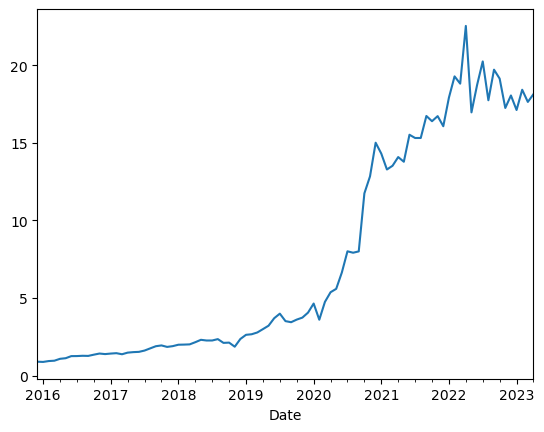

In [67]:
pd.Series(returns, index=mtl_12.index[:-1]).cumprod().plot()

In [46]:
s_p500 = yf.download('^GSPC',start=start).Close

[*********************100%***********************]  1 of 1 completed


In [47]:
s_p500

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2023-05-15    4136.279785
2023-05-16    4109.899902
2023-05-17    4158.770020
2023-05-18    4198.049805
2023-05-19    4191.979980
Name: Close, Length: 2110, dtype: float64

In [48]:
 4191.979980/2058.199951

2.0367214458261347